###### SECTION1 - Data Preparation

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

In [4]:
x = pd.read_csv('.\TrainingData_Hardworkpaysoff\Linear_X_Train.csv')
y = pd.read_csv('.\TrainingData_Hardworkpaysoff\Linear_Y_Train.csv')

In [13]:
x.describe().T #std is approx 1 so its already normalised

,count,mean,std,min,25%,50%,75%,max
x,3750.0,-0.037795,0.992212,-3.546299,-0.698443,-0.035028,0.629425,4.091393


In [18]:
y.describe().T  #need to be normalised

,count,mean,std,min,25%,50%,75%,max
y,3750.0,0.683869,81.102629,-286.959739,-54.036989,0.18064,54.695511,348.899461


In [99]:
#1. Convert the data to numpy arrays
#x_data = pd.DataFrame(x)       
#y_data = pd.DataFrame(y)

In [100]:
x_val = x_data.values
y_val = y_data.values

In [101]:
#2. NORMALISE THE DATA
#inmportant.....formula to normalise the data.  data is normalised usually when there is a huge scale difference between different features (multivariate features). 
x_val = (x_val - x_val.mean())/x_val.std() 
x_val #this question has only 1 feature, x
type(x_val)
x_val.std()

1.0

Text(0.5, 1.0, 'Hardwork Vs Performance')

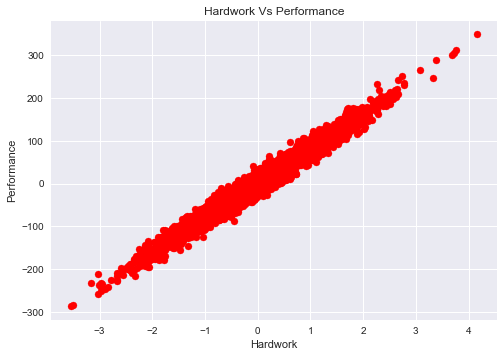

In [102]:
#3. Visualise the Data
plt.style.use('seaborn')       
plt.scatter(x_val,y_val,c='r')
plt.xlabel('Hardwork')
plt.ylabel('Performance')
plt.title('Hardwork Vs Performance')

###### SECTION2 - linear Regression

In [142]:
def Hypothesis(x,theta):
    y_ = theta[0] + theta[1]*x
    return y_

In [143]:
def gradient(x,y,theta):
    m = x.shape[0]
    grad = np.zeros((2,))
    for i in range(m):
        y_ = Hypothesis(x[i],theta)
        grad[0] = grad[0]+(y_ - y[i])
        grad[1] = grad[1]+(y_ - y[i])*x[i]
    return grad/m

In [144]:
def error(x,y,theta):
    m = x.shape[0]
    j = 0.0
    for i in range(m):
        y_ = Hypothesis(x[i],theta)
        j = j + (y_-y[i])**2
    return j/m


In [145]:
def gradient_descent(x,y,lr = 0.1,steps=100):
    theta = np.zeros((2,))
    error_list = []
    for i in range(steps):
        grad = gradient(x,y,theta)
        theta[0] = theta[0] - lr*grad[0]
        theta[1] = theta[1] - lr*grad[1]
        e = error(x,y,theta)
        error_list.append(e)
    return theta,error_list

In [146]:
theta,error = gradient_descent(x_val,y_val)

In [147]:
theta 

array([ 0.6838508 , 79.90361453])

In [148]:
error

[array([5363.12510257]),
 array([4380.41289317]),
 array([3584.41600355]),
 array([2939.65852295]),
 array([2417.40496367]),
 array([1994.37958066]),
 array([1651.72902041]),
 array([1374.18206661]),
 array([1149.36903404]),
 array([967.27047765]),
 array([819.77064698]),
 array([700.29578413]),
 array([603.52114523]),
 array([525.13368772]),
 array([461.63984713]),
 array([410.20983626]),
 array([368.55152745]),
 array([334.80829731]),
 array([307.47628091]),
 array([285.33734761]),
 array([267.40481165]),
 array([252.87945752]),
 array([241.11392067]),
 array([231.58383582]),
 array([223.8644671]),
 array([217.61177843]),
 array([212.54710061]),
 array([208.44471157]),
 array([205.12177646]),
 array([202.43019901]),
 array([200.25002128]),
 array([198.48407732]),
 array([197.05366271]),
 array([195.89502687]),
 array([194.95653185]),
 array([194.19635088]),
 array([193.58060429]),
 array([193.08184956]),
 array([192.67785822]),
 array([192.35062524]),
 array([192.08556653]),
 array([

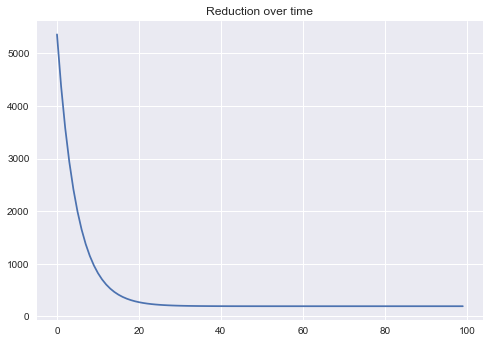

In [149]:
plt.plot(error)
plt.title('Reduction over time')
plt.show()

###### SECTION3 - Prediction & Best Line

In [150]:
y_ = Hypothesis(x_val,theta)

In [151]:
y_

array([[-19.5733619 ],
       [-43.69571729],
       [ 86.4848761 ],
       ...,
       [-20.85044708],
       [138.70197319],
       [-35.87897262]])

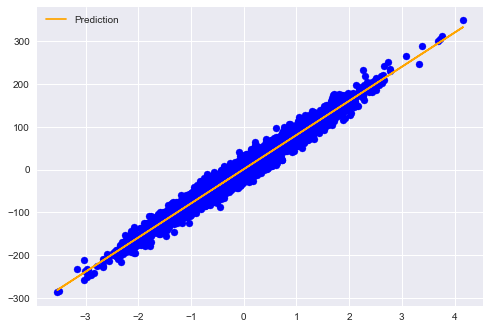

In [158]:
plt.scatter(x_val,y_val,c='b')
plt.plot(x_val,y_,color = 'orange',label = 'Prediction')  #this is your prediction & best line
plt.legend()
plt.show()

In [165]:
x_test = pd.read_csv('.\Test_Cases\Linear_X_Test.csv')

In [166]:
x_test = x_test.values

In [167]:
y_result = Hypothesis(x_test,theta)

In [169]:
df = pd.DataFrame(data = y_result,columns=['y'])

In [170]:
df

,y
0,-149.370696
1,-68.754940
2,-201.486870
3,221.234243
4,47.906897
...,...
1245,-12.744630
1246,75.171802
1247,10.912138
1248,-21.532358


In [171]:
df.to_csv('y_prediction.csv')

###### SECTION4 - Score Checking & Accuracy by using R2 or Coefficient of Determination


In [175]:
#since we don't have Y_correct_prediction to compare to our y_prediction...we'll compare y_ to y.
def R2score(Y,Y_):
    num = np.sum((Y-Y_)**2)
    denom = np.sum((Y-Y_.mean())**2)
    score = 1 - num/denom
    return score*100

In [176]:
R2score(y_val,y_)

97.09612226971657